<h1 style="color:#069">Data Analysis - Description</h1>

The goal of this data analysis is to gain insights from the Corona data base of the John Hopkins universety (JH).
These insights will help me write the functions for the datamanager.py of the CoronaBot.

To be exact, these are the Questions I need to answer: 

- [x] How is the data organized?

Time Series and The dailys?:

- [x] Where is the data that I need? 
- [x] How should I organize the data infrastructure for the data manager?


<h2 style="color:#777">Further Questions</h2>

- [x] How do I send the mathplot output to a another function?


<h1 style="color:#069">Explore the Data</h1>

In this "Exploring the Data" part I am getting an overview over the data set.

In [1]:
#%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec # For pie chart
import seaborn as seb
#import missingno as msno
from IPython.display import Markdown, display, Image
import os
from pathlib import Path
import pickle
#from wordcloud import WordCloud 
import re

<h2 style="color:#777">Check out the File Structure</h2>

In [2]:
!pwd

/home/deb/Documents/Programmes/CoronaBotRepos/CoronaBot/DataAnalysis


In [3]:
# List files in the Hopkkins Folder:
rootdir=os.listdir("../../JohnHopkins/")
rootdir

['csse_covid_19_data',
 'README.md',
 'who_covid_19_situation_reports',
 'archived_data',
 '.gitignore',
 '.git']

In [4]:
# Code I copied from https://stackoverflow.com/questions/9727673/list-directory-tree-structure-in-python
# Credit to: Rubén Cabrera and PaulDong on Stack overflow 
# Noz included in this nb for better overvew

In [5]:
def print_file_structure(str):
    paths = DisplayablePath.make_tree(Path(str))
    for path in paths:
        print(path.displayable())

In [6]:
# Print the file structure with th finction above 

In [7]:
#print_file_structure('../../JohnHopkins/'+rootdir[0])

In [8]:
#print_file_structure('../../JohnHopkins/'+rootdir[2])

In [9]:
#print_file_structure('../../JohnHopkins/'+rootdir[3])

<h3 style="color:#888">Folder Structure</h3>


```bash
JohnHopkins
│   └── README.md
├── csse_covid_19_data
│   └── csse_covid_19_daily_reports
│   │   ├── 01-22-2020.csv
│   │   ├── 01-23-2020.csv
│   │   .  
│   │   .
│   │   .
│   │   └── README.md
│   │
│   └── csse_covid_19_time_series
│   │   ├── README.md
│   │   ├── time_series_covid19_confirmed_global.csv
│   │   ├── time_series_covid19_confirmed_US.csv
│   │   ├── time_series_covid19_deaths_global.csv
│   │   ├── time_series_covid19_deaths_US.csv
│   │   └── time_series_covid19_recovered_global.csv
│   ├──  README.md
│   └── UID_ISO_FIPS_LookUp_Table.csv
└── archived_data
│   └── archived_daily_case_updates/
│       ├── 01-21-2020_2200.csv
│       ├── 01-22-2020_2200.csv
│       .
│       .
│       .
│       └── README.md
├──── archived_time_series/
│       ├── time_series_19-covid-Confirmed_archived_0325.csv
│       ├── time_series_19-covid-Deaths_archived_0325.csv
│       .
│       .
│       └── README.md
└── who_covid_19_situation_reports
    ├── README.md
    └──who_covid_19_sit_rep_pdfs/
       ├── 20200121-sitrep-1-2019-ncov.pdf
       ├── 20200122-sitrep-2-2019-ncov.pdf
       .  
       .
       .
       └── who_covid_19_sit_rep_time_series/
           └── who_covid_19_sit_rep_time_series.csv
```

**What is that Lokup file?**

In [10]:
#Defining my general data folder path
hop = Path("/home/deb/Documents/Programmes/CoronaBotRepos/JohnHopkins/csse_covid_19_data")

In [11]:
LookUp = pd.read_csv(hop/'UID_ISO_FIPS_LookUp_Table.csv')

In [12]:
Lookup = pd.DataFrame(LookUp)

In [13]:
LookUp

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
3,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
4,24,AO,AGO,24.0,NaN,NaN,NaN,Angola,-11.202700,17.873900,Angola,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3566,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
3567,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
3568,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
3569,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


That is just the file that contains the coordinates fo the countries and provinces. 

**Checkout the Time Series (ts) Files**

In [14]:
#defining path to the time series
time_ser_path = Path("/home/deb/Documents/Programmes/CoronaBotRepos/JohnHopkins/csse_covid_19_data/csse_covid_19_time_series/")

In [15]:
ts_csvs = os.listdir(time_ser_path)
ts_csvs

['README.md',
 '.gitignore',
 'time_series_covid19_deaths_global.csv',
 'time_series_covid19_deaths_US.csv',
 'time_series_covid19_recovered_global.csv',
 'time_series_covid19_confirmed_global.csv',
 'time_series_covid19_confirmed_US.csv']

**README**

In [16]:
Readme = hop/time_ser_path/"README.md"

In [17]:
with open(Readme, "r") as f:
    read=f.read()
    
print(read)

[Upcoming changes in time series tables (3/22)](https://github.com/CSSEGISandData/COVID-19/issues/1250)

Note: some records may look incomplete or inconsistent with previous days due to the modification from the data source.

<b>---DEPRICATED WARNING---</b><br>
The files below will no longer be updated. With the release of the new data structure, we are updating our time series tables to reflect these changes. Please reference time_series_covid19_confirmed_global.csv and time_series_covid19_deaths_global.csv for the latest time series data. <br><br>
time_series_19-covid-Confirmed.csv	<br>
time_series_19-covid-Deaths.csv	<br>
time_series_19-covid-Recovered.csv



Oh okay, so the last data of this file is the most recent, It won't be updated anymore...

**Update**

The data is updated on the daily.:

**README of the achived Data**

Announcement

This folder contains the previously posted dashboard case reports from Jan 21 to Feb 14, 2020 for the coronavirus COVID-19 (formerly known as 2019-nCoV). Please now refer to the data provided in the new folder, entitled "csse_covid_19_data folder". Moving forward we will be updating daily case reports into this new folder. Additionally, the previously uploaded data from Jan 21-Feb 14, 2020 is also included in the new folder, and it has been cleaned and re-formatted to address inconsistencies in the timezone and update frequency that resulted during the transition from our manual updates to automated updates (which took place on Feb 1, 2020. The new folder now includes one case report per day, from the same time of day. This will be the standard moving forward (as of Feb 14, 2020).


**Printing out an example file: deaths_global**

In [18]:
df_deaths_global = pd.DataFrame(pd.read_csv(hop/"csse_covid_19_time_series"/ts_csvs[2]))

In [19]:
df_deaths_global

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
0,NaN,Afghanistan,33.00000,65.000000,0,0,0,0,0,0,...,4,4,6,6,7,7,11,14,14,15
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,15,15,16,17,20,20,21,22,22,23
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,44,58,86,105,130,152,173,193,205,235
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12,14,15,16,17,18,21,22,23,25
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Falkland Islands (Malvinas),United Kingdom,-51.79630,-59.523600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,Saint Pierre and Miquelon,France,46.88520,-56.315900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.87700,31.307000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.21550,-12.885800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df_deaths_global["Country/Region"].value_counts()

China                     33
Canada                    15
France                    11
United Kingdom            11
Australia                  8
                          ..
Panama                     1
Djibouti                   1
Gambia                     1
Antigua and Barbuda        1
Bosnia and Herzegovina     1
Name: Country/Region, Length: 184, dtype: int64

**TO DO:**

- [x] drop the coordinates
- [x] drop the province/state
- [x] combine all rows with the same name 
- [x] plot timeseries of one or two rows 
- [x] try to send the plot to a function

In [21]:
# Delete coordinate and Province columns
df = df_deaths_global.drop(['Province/State', 'Lat', 'Long'], axis=1) 
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,4,4,6,6,7,7,11,14,14,15
1,Albania,0,0,0,0,0,0,0,0,0,...,15,15,16,17,20,20,21,22,22,23
2,Algeria,0,0,0,0,0,0,0,0,0,...,44,58,86,105,130,152,173,193,205,235
3,Andorra,0,0,0,0,0,0,0,0,0,...,12,14,15,16,17,18,21,22,23,25
4,Angola,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,United Kingdom,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,France,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,South Sudan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,Western Sahara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df1 = df.groupby("Country/Region").sum()
df1

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,4,4,6,6,7,7,11,14,14,15
Albania,0,0,0,0,0,0,0,0,0,0,...,15,15,16,17,20,20,21,22,22,23
Algeria,0,0,0,0,0,0,0,0,0,0,...,44,58,86,105,130,152,173,193,205,235
Andorra,0,0,0,0,0,0,0,0,0,0,...,12,14,15,16,17,18,21,22,23,25
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
all_countries = df1.index.tolist()
for i in all_countries: print(i)

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burma
Burundi
Cabo Verde
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Denmark
Diamond Princess
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Liberia
Libya
Liechtenstein
Lithuania
Luxembourg
MS Zaandam
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Mauritania
Ma

In [24]:
filename = 'list_of_all_countries.pickl'

with open(filename,"wb") as f: 
    pickle.dump(all_countries, f )

In [25]:
os.listdir()

['Untitled.ipynb',
 'README.md',
 'Plot.png',
 'list_of_all_countries.pickl',
 'Functions _right.ipynb',
 'Functions.ipynb',
 'Data Preperation.ipynb',
 'EDA .ipynb',
 '.ipynb_checkpoints']

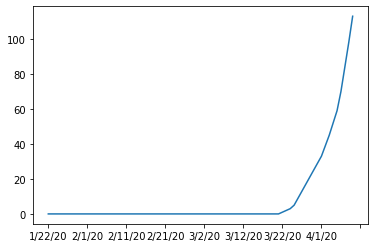

In [26]:
#Plot one row as an example 
ts = df1.loc['Afghanistan']
ts = ts.cumsum()
ts.plot()

In [27]:
#Plot sveral countries 
country_list = ['Afghanistan', 'Algeria', 'United Kingdom']
df2 = df1.loc[country_list]
df2

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,4,4,6,6,7,7,11,14,14,15
Algeria,0,0,0,0,0,0,0,0,0,0,...,44,58,86,105,130,152,173,193,205,235
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,1793,2357,2926,3611,4320,4943,5385,6171,7111,7993


In [28]:
df3 = df2.T
df3.columns = [country_list]
df3

,Afghanistan,Algeria,United Kingdom
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
4/5/20,7,152,4943
4/6/20,11,173,5385
4/7/20,14,193,6171
4/8/20,14,205,7111


'\n* add a description of the graph \n\n'

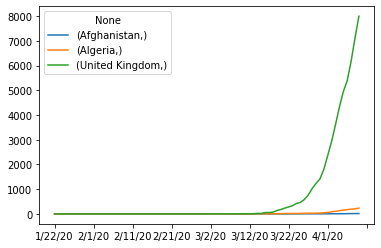

In [29]:
ts = df3
ts.plot()

# TO DO #:
'''
* add a description of the graph 

'''


In [30]:
os.listdir()

['Untitled.ipynb',
 'README.md',
 'Plot.png',
 'list_of_all_countries.pickl',
 'Functions _right.ipynb',
 'Functions.ipynb',
 'Data Preperation.ipynb',
 'EDA .ipynb',
 '.ipynb_checkpoints']

AttributeError: 'list' object has no attribute 'get_figure'

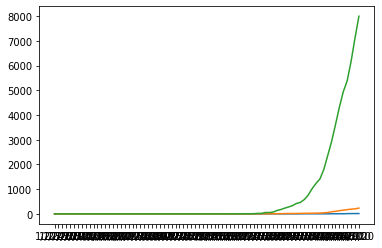

In [31]:
    # Plot
    plot = plt.plot(ts)
    fig = plot.get_figure()
    fig.savefig("output.png")



In [35]:
ts

,Afghanistan,Algeria,United Kingdom
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
...,...,...,...
4/5/20,7,152,4943
4/6/20,11,173,5385
4/7/20,14,193,6171
4/8/20,14,205,7111


In [52]:
ts=ts.T

In [82]:
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

category = 'Deaths per country'

Title= category+' for countries: \n'
# Create Title
for i in range(len(country_list)):
    if country_list[i]!= country_list[-1]:
        Title = Title+country_list[i]+", "
    else:
        Title = Title+ 'and '+country_list[i]+"."

Title

'Deaths per country for countries: \nAfghanistan, Algeria, and United Kingdom.'

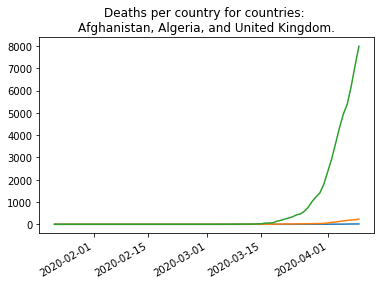

In [88]:
# create plot
plt.plot()
x_values = pd.to_datetime(ts.index)

for i in ts.columns: # selected countries 
    '''
    converting the dates (indexies) to the data type date type
    This enables me to modify the dateformat with matplotlib
    '''
    '''
    converting the column name into a list.
    '''
    y_values = ts[i].tolist()
    plt.plot(x_values,y_values)

date_format = mpl_dates.DateFormatter('%b, %d, %Y')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()
plt.title(Title)
plt.savefig("Plot.png")

In [38]:
!pwd

/home/deb/Documents/Programmes/CoronaBotRepos/CoronaBot/DataAnalysis


In [39]:
ts.index.tolist()

[('Afghanistan',), ('Algeria',), ('United Kingdom',)]

In [40]:
category = 'Deats per country '

Title

'Deaths per country for countries: \nAfghanistan, Algeria, and United Kingdom.'

In [56]:
category = "confirmed"
link = f"storage/"+category+".pkl"

In [60]:
display(link)

'storage/confirmed.pkl'

In [41]:
df1

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,4,4,6,6,7,7,11,14,14,15
Albania,0,0,0,0,0,0,0,0,0,0,...,15,15,16,17,20,20,21,22,22,23
Algeria,0,0,0,0,0,0,0,0,0,0,...,44,58,86,105,130,152,173,193,205,235
Andorra,0,0,0,0,0,0,0,0,0,0,...,12,14,15,16,17,18,21,22,23,25
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
os.listdir('../data')

['.~lock.death_rates.csv#', 'README.md', 'populations.csv', 'death_rates.csv']

In [43]:
!pwd

/home/deb/Documents/Programmes/CoronaBotRepos/CoronaBot/DataAnalysis


In [44]:
dirr = Path("/home/deb/Documents/Programmes/CoronaBotRepos/CoronaBot")

In [45]:
death_rates = pd.read_csv(dirr/"data/death_rates.csv")


In [46]:
populations = pd.read_csv(dirr/"data/populations.csv")

In [47]:
death_rates

,countries,death_rate
0,Lesotho,15.0
1,Lithuania,14.6
2,Bulgaria,14.5
3,Latvia,14.5
4,Ukraine,14.4
...,...,...
221,Gaza Strip,3.1
222,Bahrain,2.8
223,Kuwait,2.2
224,United Arab Emirates,1.9


In [48]:
populations

,,,,,,,,#;Country (or dependency);Population (2020);Yearly Change;Net Change;Density (P/Km²);Land Area (Km²);Migrants (net);Fert. Rate;Med. Age;Urban Pop %;World Share
1;China;1,439,323,776;0.39 %;5,540,090;153;9,388,211;-348,399;01. Jul;38;61%;18.47 %
2;India;1,380,004,385;0.99 %;13,586,631;464;2,973,190;-532,687;02. Feb;28;35%;17.70 %
3;US;331,002,651;0.59 %;1,937,734;36;9,147,420;954,806;01. Aug;38;83%;4.25 %,NaN
4;Indonesia;273,523,615;1.07 %;2,898,047;151;1,811,570;-98,955;02. Mär;30;56%;3.51 %,NaN
5;Pakistan;220,892,340;2.00 %;4,327,022;287;770,88;-233,379;03. Jun;23;35%;2.83 %,NaN,NaN
...,...,...,...,...,...,...,...,...
231;Montserrat;4,992;0.06 %;3;50;100;;N.A.;N.A.;10%;0.00 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232;Falkland Islands;3,48;3.05 %;103;0;12,17;;N.A.;N.A.;66%;0.00 %,NaN,NaN,NaN,NaN,NaN,NaN
233;Niue;1,626;0.68 %;11;6;260;;N.A.;N.A.;46%;0.00 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN
234;Tokelau;1,357;1.27 %;17;136;10;;N.A.;N.A.;0%;0.00 %,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NameError: name 'status_counts' is not defined

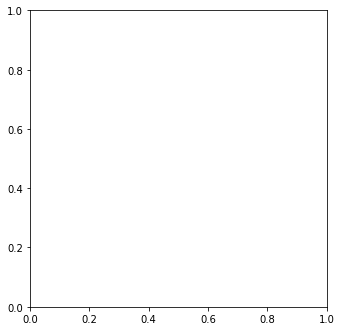

In [49]:
plt.figure(1, figsize=(20,12))
the_grid = GridSpec(2, 3)


cmap = plt.get_cmap('Blues_r')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]


plt.subplot(the_grid[0, 1], aspect=1, title='')

source_pie = plt.pie(status_counts, labels=status_labels, autopct='%1.1f%%', shadow=True, colors=colors)


plt.suptitle('Percentages of Delivery Stati', fontsize=16)


plt.show()

In [50]:
plt.plot
cmap = plt.get_cmap('Blues_r')


In [77]:
test_arr = ts.values
test_arr = test_arr+0

In [78]:
vector = np.array(range(79))

In [80]:
np.divide(test_arr.T,0).T



/home/deb/Programmes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/deb/Programmes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan

In [89]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,4,4,6,6,7,7,11,14,14,15
1,Albania,0,0,0,0,0,0,0,0,0,...,15,15,16,17,20,20,21,22,22,23
2,Algeria,0,0,0,0,0,0,0,0,0,...,44,58,86,105,130,152,173,193,205,235
3,Andorra,0,0,0,0,0,0,0,0,0,...,12,14,15,16,17,18,21,22,23,25
4,Angola,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,United Kingdom,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,France,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,South Sudan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,Western Sahara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# I need one series per country 

In [90]:
deaths

NameError: name 'deaths' is not defined

In [119]:
death_rates.head()

,countries,death_rate
0,Lesotho,15.0
1,Lithuania,14.6
2,Bulgaria,14.5
3,Latvia,14.5
4,Ukraine,14.4


In [126]:
#converting death_rates into Series 
index = death_rates['countries'].tolist()
values = death_rates['death_rate'].values 
death_rates_s = pd.Series(values, index = index)
display(death_rates_s)

Lesotho                 15.0
Lithuania               14.6
Bulgaria                14.5
Latvia                  14.5
Ukraine                 14.4
                        ... 
Gaza Strip               3.1
Bahrain                  2.8
Kuwait                   2.2
United Arab Emirates     1.9
Qatar                    1.5
Length: 226, dtype: float64

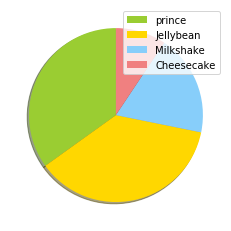

In [165]:
labels = ['prince', 'Jellybean', 'Milkshake', 'Cheesecake']
sizes = [38.4, 40.6, 20.7, 10.3]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="upper right")
#plt.axis('equal')
#plt.tight_layout()
plt.show()

In [95]:
texts

[Text(-0.9786769670932933, 0.5021866128055119, ''),
 Text(0.23075115697817564, -1.0755249432501477, ''),
 Text(1.0168675469053137, 0.41950016930958456, ''),
 Text(0.31893723684184266, 1.052748326503391, '')]

In [109]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,4,4,6,6,7,7,11,14,14,15
1,Albania,0,0,0,0,0,0,0,0,0,...,15,15,16,17,20,20,21,22,22,23
2,Algeria,0,0,0,0,0,0,0,0,0,...,44,58,86,105,130,152,173,193,205,235
3,Andorra,0,0,0,0,0,0,0,0,0,...,12,14,15,16,17,18,21,22,23,25
4,Angola,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,United Kingdom,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
259,France,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,South Sudan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,Western Sahara,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
country_list = ['Qatar', 'Kuwait', 'Ukraine']
test= df1.loc[country_list]
test

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Qatar,0,0,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,6,6,6
Kuwait,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
Ukraine,0,0,0,0,0,0,0,0,0,0,...,17,20,22,27,32,37,38,45,52,57


In [130]:
death_rates_s.describe()

count    226.000000
mean       7.717699
std        2.752832
min        1.500000
25%        5.900000
50%        7.400000
75%        9.400000
max       15.000000
dtype: float64

In [140]:
death_rates_s

1744.1999999999998

In [144]:
test.loc['Qatar']

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
          ..
4/5/20     4
4/6/20     4
4/7/20     6
4/8/20     6
4/9/20     6
Name: Qatar, Length: 79, dtype: int64

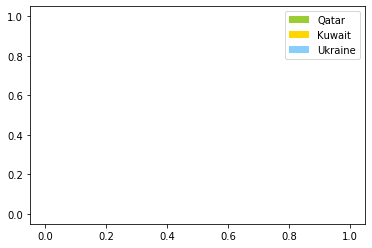

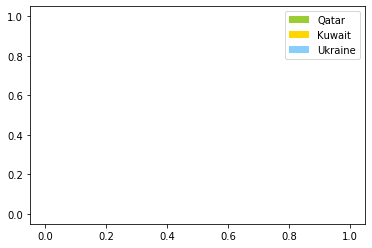

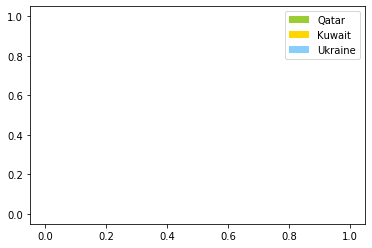

'\nlables = country_list\nsizes = [normal, corona]\n    country = country_list[i]\n    days_regarded = len(df)\n    corona_deaths_in_days_regarded = sum of elements in df[country]\n    Normal_Deaths_in_days_regarded = days_regarded * death_rates_s[country]\n    all_deaths = Normal_Deaths_in_days_regarded + corona_deaths_in_days_regarded\n    normal = Normal_Deaths_in_days_regardedall_deaths\n    corona = corona_deaths_in_days_regarded / corona_deaths_in_days_regarded\ncolors = [\'blue\', \'green\']\npatches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90) // what are these texts?\nplt.legend(patches, labels, loc="best")\n\n#plt.axis(\'equal\')\n#plt.tight_layout()\n\nplt.show()\n\nimage_number = str(image_count)\nplt.savefig("Plot{image_number}.png") \n\nimage_paths = os.listdir(./*.png)\nreturn (image_paths)\n'

<Figure size 432x288 with 0 Axes>

In [167]:
from glob import glob

df = test
# Define that this is the time from the beginning of our research 
image_count = 0
for i in range(len(country_list)):
    plt.plot()
    # calculate the sizes of the pie slices
    country = country_list[i]
    days_regarded = len(df)
    corona_deaths_in_days_regarded = df.loc[country].sum()
    Normal_deaths_in_days_regarded = days_regarded * death_rates_s[country]
    all_deaths = Normal_deaths_in_days_regarded + corona_deaths_in_days_regarded
    
    #Slice sizes
    normal_deaths = Normal_deaths_in_days_regarded/all_deaths
    corona_deaths = corona_deaths_in_days_regarded/corona_deaths_in_days_regarded
    
    labels = country_list
    sizes = [normal_deaths, corona_deaths]
    colors = ['blue', 'green']
    patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90) // what are these texts?
    plt.legend(patches, labels, loc="best")
    plt.show()
    
    image_number = str(image_count)
    plt.savefig(f"Plot-{image_number}.png") 
    image_count += 1

image_paths = glob("*.png")
return (image_paths)

'''
lables = country_list
sizes = [normal, corona]
    country = country_list[i]
    days_regarded = len(df)
    corona_deaths_in_days_regarded = sum of elements in df[country]
    Normal_Deaths_in_days_regarded = days_regarded * death_rates_s[country]
    all_deaths = Normal_Deaths_in_days_regarded + corona_deaths_in_days_regarded
    normal = Normal_Deaths_in_days_regardedall_deaths
    corona = corona_deaths_in_days_regarded / corona_deaths_in_days_regarded
colors = ['blue', 'green']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90) // what are these texts?
plt.legend(patches, labels, loc="best")

#plt.axis('equal')
#plt.tight_layout()

plt.show()

image_number = str(image_count)
plt.savefig("Plot{image_number}.png") 

image_paths = os.listdir(./*.png)
return (image_paths)
'''
    



['Plot2.png', 'Plot.png', 'Plot0.png', 'Plot1.png']